## <center><u>Bagging and Random Forest Ensemble algorithms</u></center>


### **`1. Data Understanding and Cleaning`**


In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings

warnings.filterwarnings("ignore")

In [4]:
# Reading the csv file and putting it into 'df' object.
df =pd.read_csv('/content/credit-card-default.csv') 

# print head
df.head()



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Let's understand the type of columns
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In this case, we know that there are no major data quality issues, so we'll go ahead and build the model.

### **`2. Data Preparation and Model Building`**




In [5]:
# Importing test_train_split from sklearn library

from sklearn.model_selection import train_test_split



In [6]:
# Putting feature variable to X
X =df.drop('defaulted',axis=1)


# Putting response variable to y
y = df['defaulted']



# Splitting the data into train and test with test size as 30% and random state as 101
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)



In [7]:
# import StandardScaler, DecisionTreeClassifier and make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline







In [8]:
## Pipeline Estimator with StandardScaler and DecisionTreeClassifier with random_state as 1
pipeline = make_pipeline(StandardScaler(),DecisionTreeClassifier(random_state=1))




# fit model on training data

pipeline.fit(X_train,y_train)




Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=1))])

In [9]:
# Model scores on test and training data
print('Model test Score: %.3f' %pipeline.score(X_test,y_test))
print('Model training Score: %.3f' %pipeline.score(X_train,y_train))






Model test Score: 0.728
Model training Score: 1.000


 Note- model tends to overfit the data as the test score is 0.72 and training score is 1.00.


In [10]:
# import BaggingClassifier

from sklearn.ensemble import BaggingClassifier



# Instantiate the bagging classifier with base_estimator as pipeline and random_state=1
bgclassifier = BaggingClassifier(base_estimator=pipeline,random_state=1)



#fitting above model on training data
bgclassifier.fit(X_train,y_train)




## Model scores on test and training data

print('Model test Score: %.3f' %bgclassifier.score(X_test,y_test))
print('Model training Score: %.3f' %bgclassifier.score(X_train,y_train))




Model test Score: 0.810
Model training Score: 0.979


The model comes up with the following scores. Note that the model tends to overfit the data as the test score is 0.81 and training score is 0.98. However, the model will give better generalization performance than the model fit with Descision Tree alone.





Wohooo! did you observe that we have succesfully eliminated problem of overfitting using bagging method and hyperparameter tuning it.


#### **`RandomForest Classifier`**



Lets check RandomForest algorithm for doing bagging.


Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

Random forest is an extension of bagging that also randomly selects subsets of features used in each data sample.


In [13]:
# Importing random forest classifier from sklearn library

from sklearn.ensemble import RandomForestClassifier


# Running the random forest with default parameters, but random_state as 1
rfc = RandomForestClassifier(random_state=1)


# fit model on training data
rfc.fit(X_train,y_train)



RandomForestClassifier(random_state=1)

In [14]:
# Making predictions
predictions =rfc.predict(X_test) 




In [15]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score



# Let's check the report of our default model
print(classification_report(y_test,predictions))





              precision    recall  f1-score   support

           0       0.85      0.95      0.89      7058
           1       0.66      0.37      0.47      1942

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [16]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))




#Printing accuracy
print(accuracy_score(y_test,predictions))




[[6683  375]
 [1224  718]]
0.8223333333333334


Hyperparameter Tuning

In [17]:
# import Kfold 
from sklearn.model_selection import KFold





# specify number of folds for k-fold CV which is 5
n_folds = 5

# parameters to build the model on here max_depth with range(2, 20, 5)
parameters ={'max_depth':range(2,20,5)} 



# instantiate the model Random Forest with random_state=1
rf = RandomForestClassifier(random_state=1)




# Instantiate GridSearchCVwith rf, parameter, cv and scoring as accuracy and return_train_score=True
rf = GridSearchCV(rf,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)



# fit tree on training data
rf.fit(X_train,y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [18]:
# scores of GridSearch CV
scores =rf.cv_results_ 


# convert scores into dataframe and print head
pd.DataFrame(scores).head()




,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.949805,0.037145,0.039839,0.002490,2,{'max_depth': 2},0.803095,0.803095,0.800476,0.796905,...,0.800905,0.002271,4,0.801190,0.799464,0.801667,0.803333,0.801786,0.801488,0.001242
1,2.352500,0.027917,0.056679,0.002070,7,{'max_depth': 7},0.815238,0.819762,0.818095,0.817857,...,0.817667,0.001455,1,0.831012,0.831071,0.831548,0.833333,0.834107,0.832214,0.001267
2,3.635226,0.038570,0.081327,0.001923,12,{'max_depth': 12},0.813095,0.819286,0.820476,0.814286,...,0.816905,0.002829,2,0.883929,0.886012,0.884345,0.887560,0.885298,0.885429,0.001290
3,4.651633,0.209179,0.106285,0.003201,17,{'max_depth': 17},0.812143,0.815952,0.820000,0.808571,...,0.815190,0.004326,3,0.926845,0.930536,0.931548,0.929524,0.927857,0.929262,0.001716


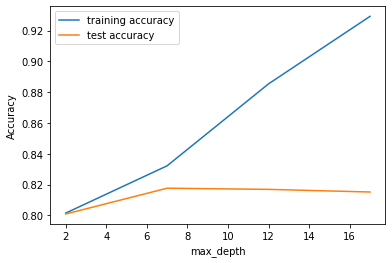

In [19]:
# plotting accuracies with max_depth
plt.figure()

# code below
plt.plot(scores['param_max_depth'],scores['mean_train_score'],label='training accuracy')
plt.plot(scores['param_max_depth'],scores['mean_test_score'],label='test accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()

plt.show()




### **`Tuning n_estimators`**



In [20]:

# parameters to build the model on (here n_estimators with range(100, 1500, 400))
parameters = {'n_estimators':range(100,1500,400)}



# instantiate the model (note we are specifying a max_depth as 4) and random_state as 1
rf = RandomForestClassifier(max_depth=4,random_state=1)





# Instantiate GridSearchCVwith rf, parameter, cv and scoring as accuracy and return_train_score as True
Rf = GridSearchCV(rf,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)




# fit tree on training data
Rf.fit(X_train,y_train)





GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, random_state=1),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [21]:
# scores of GridSearch CV
scores = Rf.cv_results_


# convert scores into dataframe and print head
pd.DataFrame(scores).head()



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.570757,0.029869,0.045956,0.001763,100,{'n_estimators': 100},0.812143,0.813333,0.812619,0.805000,...,0.810619,0.003021,1,0.811131,0.809643,0.812976,0.813214,0.813631,0.812119,0.001505
1,7.846283,0.109455,0.214789,0.004614,500,{'n_estimators': 500},0.812619,0.813571,0.810952,0.805476,...,0.810190,0.002952,2,0.811488,0.810417,0.812024,0.812560,0.812857,0.811869,0.000864
2,14.109803,0.287783,0.379576,0.008321,900,{'n_estimators': 900},0.811667,0.813810,0.811429,0.805238,...,0.810048,0.003021,3,0.811190,0.810536,0.811845,0.812798,0.812679,0.811810,0.000865
3,20.220850,0.140704,0.580071,0.060205,1300,{'n_estimators': 1300},0.811667,0.813571,0.811429,0.805000,...,0.809857,0.003103,4,0.811190,0.810238,0.811905,0.812798,0.812738,0.811774,0.000969


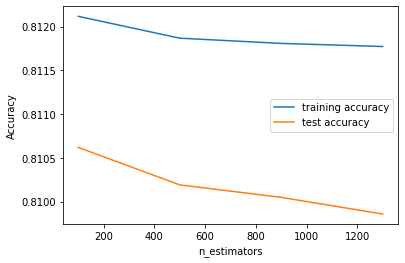

In [22]:
# plotting accuracies with n_estimators
plt.figure()

# code below
plt.plot(scores['param_n_estimators'],scores['mean_train_score'],label='training accuracy')
plt.plot(scores['param_n_estimators'],scores['mean_test_score'],label='test accuracy')
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')


plt.show()


### **`Tuning max_features`**

In [23]:

# parameters to build the model on max_features with [4, 8, 14, 20, 24]
parameters ={'max_features':[4, 8, 14, 20, 24]} 




# instantiate the model (note we are specifying a max_depth as 4) and random_state as 1
rf = RandomForestClassifier(max_depth=4,random_state=1)




# Instantiate GridSearchCVwith rf, parameter, cv and scoring as accuracy and return_train_score as True
Rf = GridSearchCV(rf,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)





# fit tree on training data
Rf.fit(X_train,y_train)




GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, random_state=1),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [24]:
# scores of GridSearch CV
scores = Rf.cv_results_


# convert scores into dataframe and print head
pd.DataFrame(scores).head()




,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.574738,0.031748,0.045487,0.002486,4,{'max_features': 4},0.812143,0.813333,0.812619,0.805000,...,0.810619,0.003021,5,0.811131,0.809643,0.812976,0.813214,0.813631,0.812119,0.001505
1,2.683688,0.033459,0.044589,0.002257,8,{'max_features': 8},0.817619,0.820952,0.820000,0.817381,...,0.818905,0.001377,1,0.821369,0.820179,0.821726,0.821369,0.821131,0.821155,0.000524
2,4.407098,0.047103,0.044853,0.001680,14,{'max_features': 14},0.817619,0.821429,0.817857,0.816429,...,0.818571,0.001737,4,0.822321,0.820952,0.821726,0.822321,0.821310,0.821726,0.000544
3,6.305623,0.244528,0.045967,0.002065,20,{'max_features': 20},0.817619,0.821905,0.819762,0.815476,...,0.818619,0.002148,3,0.822262,0.820774,0.821369,0.822798,0.821964,0.821833,0.000703
4,7.389289,0.102200,0.047579,0.004154,24,{'max_features': 24},0.818095,0.821667,0.819762,0.815000,...,0.818667,0.002190,2,0.822976,0.821250,0.821726,0.823214,0.822976,0.822429,0.000787


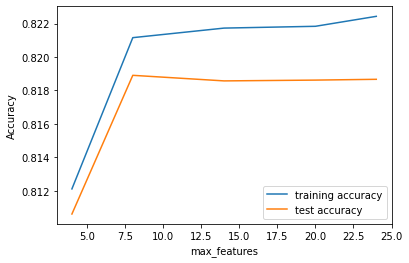

In [25]:
# plotting accuracies with max_features
plt.figure()
#code below
plt.plot(scores['param_max_features'],scores['mean_train_score'],label='training accuracy')
plt.plot(scores['param_max_features'],scores['mean_test_score'],label='test accuracy')
plt.legend()
plt.xlabel('max_features')
plt.ylabel('Accuracy')

plt.show()




### **`Tuning min_samples_leaf`**

In [26]:

# parameters to build the model on min_samples_leaf of range(100, 400, 50)
parameters = {'min_samples_leaf':range(100,400,50)}



# instantiate the model (not specifying any max_depth) and random_state as 1
rf = RandomForestClassifier(random_state=1)




# Instantiate GridSearchCVwith rf, parameter, cv and scoring as accuracy and return_train_score as True
Rf =GridSearchCV(rf,parameters,cv=n_folds,scoring='accuracy',return_train_score=True) 





# fit tree on training data
Rf.fit(X_train,y_train)






GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [27]:
# scores of GridSearch CV
scores = Rf.cv_results_


# convert scores into df and print
pd.DataFrame(scores).head()




,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.919300,0.069787,0.071556,0.003642,100,{'min_samples_leaf': 100},0.815238,0.817857,0.815238,0.811667,...,0.814286,0.002433,1,0.817679,0.816012,0.816964,0.817619,0.818333,0.817321,0.000785
1,2.741343,0.245991,0.066452,0.003415,150,{'min_samples_leaf': 150},0.812381,0.814524,0.812381,0.808095,...,0.811095,0.002571,2,0.810952,0.812262,0.812500,0.814702,0.812560,0.812595,0.001205
2,2.438431,0.029138,0.062133,0.001501,200,{'min_samples_leaf': 200},0.810952,0.811429,0.811190,0.805476,...,0.809429,0.002316,3,0.808810,0.809821,0.809583,0.811131,0.811845,0.810238,0.001098
3,2.263952,0.034204,0.061696,0.007067,250,{'min_samples_leaf': 250},0.810952,0.811429,0.809762,0.803571,...,0.808524,0.002933,4,0.808631,0.808155,0.810298,0.810298,0.810714,0.809619,0.001024
4,2.134132,0.034805,0.057119,0.001153,300,{'min_samples_leaf': 300},0.809286,0.809524,0.808810,0.804762,...,0.807476,0.002133,5,0.807798,0.806429,0.808750,0.808988,0.808869,0.808167,0.000966


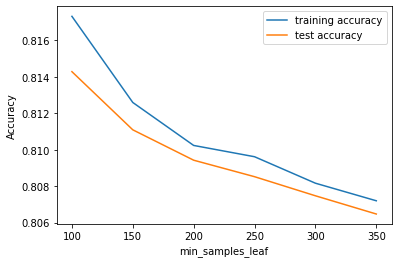

In [28]:
# plotting accuracies with min_samples_leaf
plt.figure()

# code below
plt.plot(scores['param_min_samples_leaf'],scores['mean_train_score'],label='training accuracy')
plt.plot(scores['param_min_samples_leaf'],scores['mean_test_score'],label='test accuracy')
plt.legend()
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')




plt.show()



### **`Tuning min_samples_split`**





In [29]:


# parameters to build the model on (min_samples_split with range(200, 500, 50))
parameters ={'min_samples_split':range(200,500,50)}



# instantiate the model with random_state as 1
rf = RandomForestClassifier(random_state=1)




# Instantiate GridSearchCVwith rf, parameter, cv and scoring as accuracy and return_train_score as True
Rf = GridSearchCV(rf,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)




#fitting model on training data

Rf.fit(X_train,y_train)




GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [31]:
# scores of GridSearch CV
scores =Rf.cv_results_ 


# convert scores into df and print head
pd.DataFrame(scores).head()





,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.854718,0.038964,0.077943,0.003697,200,{'min_samples_split': 200},0.818571,0.820714,0.820714,0.817381,...,0.819190,0.001318,1,0.824286,0.823333,0.823274,0.824048,0.823988,0.823786,0.000407
1,3.693939,0.026353,0.075073,0.003284,250,{'min_samples_split': 250},0.818810,0.821667,0.820000,0.816905,...,0.819143,0.001605,2,0.822321,0.821607,0.822976,0.822976,0.823274,0.822631,0.000599
2,3.689075,0.136177,0.076292,0.007857,300,{'min_samples_split': 300},0.817381,0.821667,0.822143,0.816667,...,0.818714,0.002662,3,0.821667,0.821131,0.821726,0.821964,0.822679,0.821833,0.000503
3,3.432945,0.054204,0.069254,0.001751,350,{'min_samples_split': 350},0.817857,0.821429,0.820714,0.815714,...,0.818190,0.002522,6,0.820119,0.820833,0.820655,0.822440,0.821726,0.821155,0.000825
4,3.341444,0.048825,0.068421,0.002003,400,{'min_samples_split': 400},0.816905,0.820476,0.820952,0.815952,...,0.818381,0.001983,4,0.819762,0.819881,0.820298,0.820476,0.821071,0.820298,0.000467


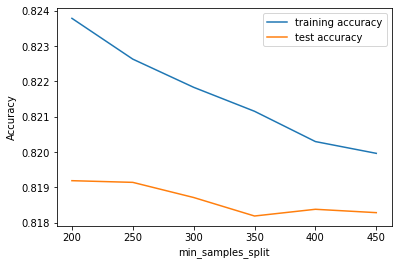

In [32]:
# plotting accuracies with min_samples_split
plt.figure()
#code below

plt.plot(scores['param_min_samples_split'],scores['mean_train_score'],label='training accuracy')
plt.plot(scores['param_min_samples_split'],scores['mean_test_score'],label='test accuracy')
plt.legend()
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')




plt.show()

#### **`Random Search to Find Optimal Hyperparameters`**
Finding the optimal hyperparameters using RandomizedSearchCV. 

with following  parameter values: 

`'max_depth': [4,8,10],
'min_samples_leaf': range(100, 400, 200),
'min_samples_split': range(200, 500, 200),
'n_estimators': [100,200, 300], 
'max_features': [5, 10]`

In [33]:
# import RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV



# Create the parameter grid based on the results of random search 
param_grid = {'max_depth': [4,8,10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100,200, 300], 'max_features': [5, 10]}




# Create a based model (i.e RF) with random_state as 1
rf = RandomForestClassifier(random_state=1)




# Instantiate the radom search model with estimator, param_grid, and random_state as 1
rs =RandomizedSearchCV(rf,param_grid,random_state=1)




In [34]:
# Fit the grid search to the data

rs.fit(X_train,y_train)




RandomizedSearchCV(estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'max_depth': [4, 8, 10],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': range(100, 400, 200),
                                        'min_samples_split': range(200, 500, 200),
                                        'n_estimators': [100, 200, 300]},
                   random_state=1)

In [35]:
# printing the optimal accuracy score and hyperparameters

print('We can get accuracy of', rs.best_score_,'using',rs.best_params_)




We can get accuracy of 0.8179047619047619 using {'n_estimators': 100, 'min_samples_split': 400, 'min_samples_leaf': 100, 'max_features': 10, 'max_depth': 8}


**Fitting the final model with the best parameters obtained from grid search.**

In [38]:
# Instantiate RF model with the best hyperparameters along with random_state as 1
rfc = RandomForestClassifier(n_estimators= 100, min_samples_split= 400, min_samples_leaf=100, max_features= 10, max_depth= 8)






In [39]:
# fit rfc on training data

rfc.fit(X_train,y_train)




RandomForestClassifier(max_depth=8, max_features=10, min_samples_leaf=100,
                       min_samples_split=400)

In [40]:
# predict
predictions =rfc.predict(X_test) 




In [41]:
# evaluation metrics using classification_report
print(classification_report(y_test,predictions))





              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.69      0.36      0.47      1942

    accuracy                           0.83      9000
   macro avg       0.77      0.66      0.68      9000
weighted avg       0.81      0.83      0.80      9000



In [43]:
#print confusion_matrix and 

print(confusion_matrix(y_test,predictions))



#print accuracy

print(accuracy_score(y_test,predictions))



[[6744  314]
 [1247  695]]
0.8265555555555556


### **` Extra Trees ALgorithm`**


In [44]:
# import ExtraTreesClassifier 
from sklearn.ensemble import ExtraTreesClassifier



#Instantiate ExtraTreesClassifier with default parameters except random_state as 1
et = ExtraTreesClassifier(random_state=1)


#fitting model on training data

et.fit(X_train,y_train)




ExtraTreesClassifier(random_state=1)

In [45]:
# Making predictions
predictions = et.predict(X_test)




In [46]:
# Let's check the report of our default model

print(classification_report(y_test,predictions))




              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7058
           1       0.62      0.36      0.45      1942

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



In [47]:
# Printing confusion matrix

print(confusion_matrix(y_test,predictions))



[[6629  429]
 [1248  694]]


In [48]:
#printing accuracy_score

print(accuracy_score(y_test,predictions))




0.8136666666666666


 we got 81 % accuracy here.

##### Random Search to Find Optimal Hyperparameters


In [52]:
# Create the parameter grid similar to random forest


param_grid = {'max_depth':[4,8,10],
              'min_samples_leaf':range(100,400,200),
              'min_samples_split':range(200,500,200),
              'n_estimators':[100,200,300],
              'max_features':[5,10]}





# Instantiate RandomizedSearchCV with et , param_grid and random state=1

rs = RandomizedSearchCV(et,param_grid,random_state=1)



# Fit the random search to the training data
rs.fit(X_train,y_train)


# printing the optimal accuracy score and hyperparameters
print(accuracy_score(y_test,predictions))


0.8136666666666666


Tuning ExtraTree Classifier

In [53]:

#Instantiate ExtraTreesClassifier with default parameters
et =ExtraTreesClassifier(random_state=1) 



#fitting model on training data
et.fit(X_train,y_train)





ExtraTreesClassifier(random_state=1)

In [54]:
# Making predictions
predictions =et.predict(X_test) 



In [55]:
#printing accuracy_score

print(accuracy_score(y_test,predictions))




0.8136666666666666
